In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:


def Histogram(image, type):
    color = (255, 255, 255)
    window_name = "Gray"
    if type == 31:
        color = (255, 0, 0)
        window_name = "Blue Histogram"
    elif type == 32:
        color = (0, 255, 0)
        window_name = "Green Histogram"
    elif type == 33:
        color = (0, 0, 255)
        window_name = "Red Histogram"
    # cv2.calcHist => 计算直方图, 第一个参数图片，第二个参数计算直方图的通道，第三个参数蒙版（用不上），第四个参数0 -255， 有256个灰度，
    #                           第五个参数值（0 - 255）
    hist = cv2.calcHist([image], [0], None, [256], [0.0, 256.0])
    # 最小值，最大值，最小值下标，最大值下标
    minV, maxV, minL, maxL = cv2.minMaxLoc(hist)

    hist_img = np.zeros([256, 256, 3], np.uint8)
    for h in range(256):
        # 归一化
        inten_normal = int(hist[h] * 256 / maxV)
        cv2.line(hist_img,(h, 256),(h, 256 - inten_normal), color)
    cv2.imshow(window_name, hist_img)
    return hist_img


img = cv2.imread("E:\\project\\python\\Tensorflow\\MuKe\\pic\\image0.jpg", 1)
# 将当前图片分为R,G,B
channels = cv2.split(img)
for i in range(0,3):
    Histogram(channels[i],31+i)
cv2.waitKey(0)

-1

In [4]:
# 灰度图像的直方图均衡化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 直方图均衡化
dst = cv2.equalizeHist(gray)

cv2.imshow("dst",dst)
cv2.waitKey(0)

-1

In [6]:
# 彩色图像的直方图均衡化
# 通道分解
(b, g, r) = cv2.split(img)
# 直方图均衡化
b_Hist = cv2.equalizeHist(b)
g_Hist = cv2.equalizeHist(g)
r_Hist = cv2.equalizeHist(r)
# 通道合并
dst = cv2.merge((b_Hist, g_Hist, r_Hist))

cv2.imshow("dst",dst)
cv2.waitKey(0)

-1

In [7]:
# YUV 直方图均衡化
img_YUV = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
channel_YUV = cv2.split(img_YUV)
channel_YUV[0] = cv2.equalizeHist(channel_YUV[0])
channels = cv2.merge(channel_YUV)
dst = cv2.cvtColor(channels, cv2.COLOR_YCrCb2BGR)

cv2.imshow("dst",dst)
cv2.waitKey(0)

-1

In [9]:
# 坏图产生
damaged = cv2.imread("E:\\project\\python\\Tensorflow\\MuKe\\pic\\image0.jpg", 1)

for i in range(200, 300):
    damaged[i, 200] = (255, 255, 255)
    damaged[i, 200 + 1] = (255, 255, 255)
    damaged[i, 200 - 1] = (255, 255, 255)

for i in range(150, 250):
    damaged[250, i] = (255, 255, 255)
    damaged[250 + 1, i] = (255, 255, 255)
    damaged[250 - 1, i] = (255, 255, 255)

cv2.imwrite("E:\\project\\python\\Tensorflow\\MuKe\\tmp\\damaged.jpg",damaged)
cv2.imshow("damaged",damaged)
cv2.waitKey(0)

-1

In [11]:
# 图片修补
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
paint = np.zeros((height,width,1),np.uint8)

for i in range(200,300):
    paint[i,200] = 255
    paint[i,200+1] = 255
    paint[i,200-1] = 255
for i in range(150,250):
    paint[250,i] = 255
    paint[250+1,i] = 255
    paint[250-1,i] = 255

cv2.imshow('paint',paint)
#1 src 2 mask
dst = cv2.inpaint(damaged, paint, 3, cv2.INPAINT_TELEA)
cv2.imshow("dst",dst)
cv2.waitKey(0)

-1

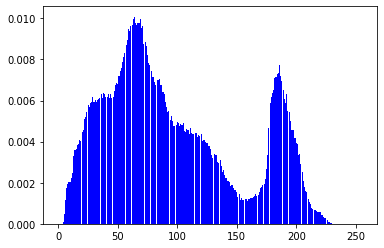

-1

In [15]:
# 灰度直方图的源码
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
count = np.zeros(256, np.float)

for i in range(0, height):
    for j in range(0, width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1

for i in range(0,255):
    count[i] = count[i]/( height * width)
x = np.linspace(0,255,256)
y = count
plt.bar(x, y, 0.9, alpha=1, color='b')
plt.show()
cv2.waitKey(0)

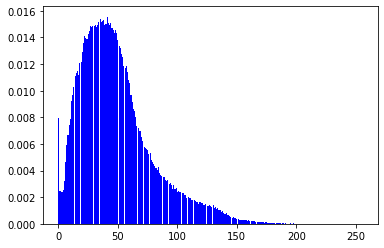

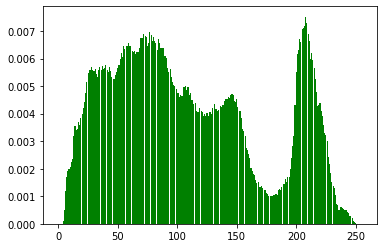

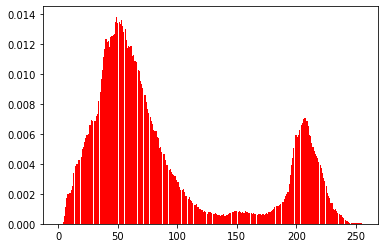

-1

In [16]:
# 彩色直方图的源码
count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        index_b = int(b)
        index_g = int(g)
        index_r = int(r)
        count_b[index_b] = count_b[index_b]+1
        count_g[index_g] = count_g[index_g]+1
        count_r[index_r] = count_r[index_r]+1
for i in range(0,256):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)

x = np.linspace(0,255,256)
y1 = count_b
plt.figure()
plt.bar(x,y1,0.9,alpha=1,color='b')
y2 = count_g
plt.figure()
plt.bar(x,y2,0.9,alpha=1,color='g')
y3 = count_r
plt.figure()
plt.bar(x,y3,0.9,alpha=1,color='r')
plt.show()
cv2.waitKey(0)

In [17]:
# 灰度直方图均衡化的源码
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
for i in range(0,255):
    count[i] = count[i]/(height*width)
#计算累计概率
sum1 = float(0)
for i in range(0,256):
    sum1 = sum1+count[i]
    count[i] = sum1
#print(count)
# 计算映射表
map1 = np.zeros(256,np.uint16)
for i in range(0,256):
    map1[i] = np.uint16(count[i]*255)
# 映射
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        gray[i,j] = map1[pixel]
cv2.imshow('dst',gray)
cv2.waitKey(0)

-1